In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import shap

%run ../../helper/preprocess.py
%run ../../helper/aggregate.py
%run ../../helper/utils.py
%run shap_analysis.py

shap.initjs()
matplotlib.rcParams['pdf.fonttype'] = 42
sns.set(font_scale=1.6)
sns.set_style("white")

In [9]:
metrics_file = '../../metrics/ddim_sd15_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = ['1027', '1003', '1013']
# keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    rank=True,
    metrics_to_include=None,
    keywords_to_exclude=keywords_to_exclude)

## Per category: Stuffed toy

In [10]:
category = 'stuffed_toy'

metrics_aggregated = aggregate_metrics(
    metrics_processed[metrics_processed['Category'] == category],
    level='All',
    group_seeds=False)
print(metrics_aggregated.shape)

(162, 141)


In [11]:
metric_types = ['Image Similarity', 'Text Similarity', 'Vendi']
encoders = ['DINOv2', 'CLIP', 'DINOv2']
modes = ['padding']
prompt_types = ['in', 'trigger', 'out']

metrics_to_include = get_metric_list(metric_types, encoders, modes,
                                     prompt_types, style_with_base_model=False)

In [12]:
del metrics_to_include[3]
del metrics_to_include[3]
del metrics_to_include[4]

In [13]:
metrics_to_include

[('Image Similarity', 'DINOv2-padding', 'in'),
 ('Image Similarity', 'DINOv2-padding', 'trigger'),
 ('Image Similarity', 'DINOv2-padding', 'out'),
 ('Text Similarity', 'CLIP', 'out'),
 ('Vendi', 'DINOv2', 'trigger'),
 ('Vendi', 'DINOv2', 'out')]

In [14]:
analysis = FeatureAnalysis(metrics_aggregated, keyword=category)
analysis.fit(metrics_to_include, test_size=None)

Fitting ('Image Similarity', 'DINOv2-padding', 'in')
Training performance
RMSE: 0.10
R2: 0.81
Fitting ('Image Similarity', 'DINOv2-padding', 'trigger')
Training performance
RMSE: 0.11
R2: 0.71
Fitting ('Image Similarity', 'DINOv2-padding', 'out')
Training performance
RMSE: 0.10
R2: 0.80
Fitting ('Text Similarity', 'CLIP', 'out')
Training performance
RMSE: 0.07
R2: 0.92
Fitting ('Vendi', 'DINOv2', 'trigger')
Training performance
RMSE: 0.10
R2: 0.61
Fitting ('Vendi', 'DINOv2', 'out')
Training performance
RMSE: 0.12
R2: 0.65


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


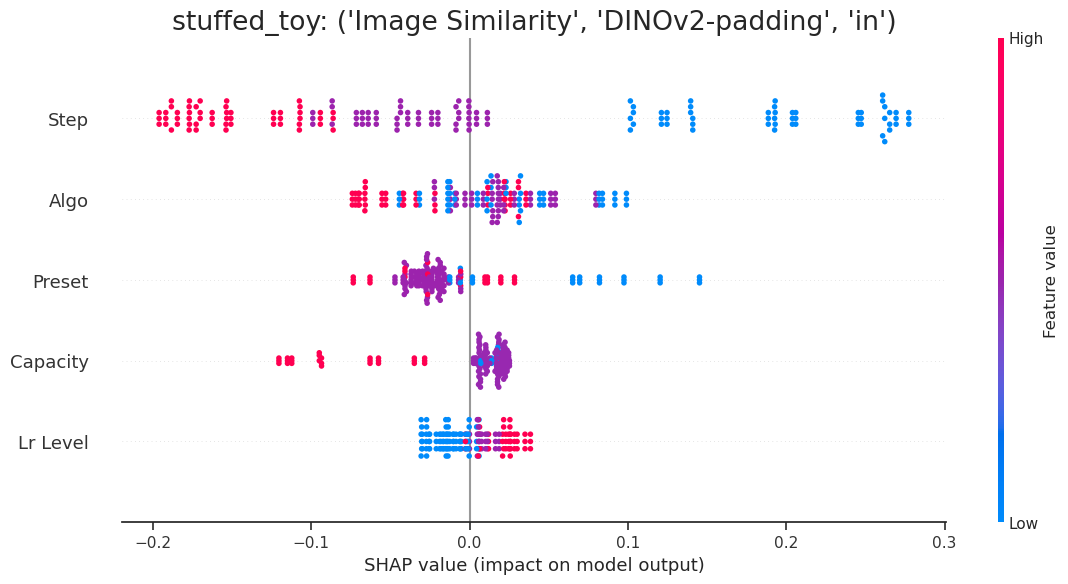

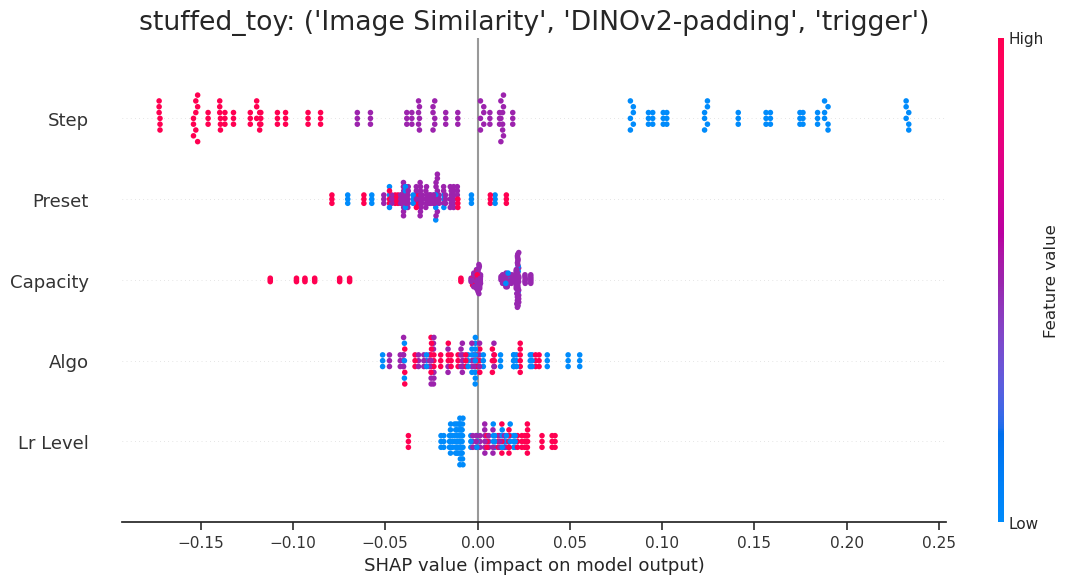

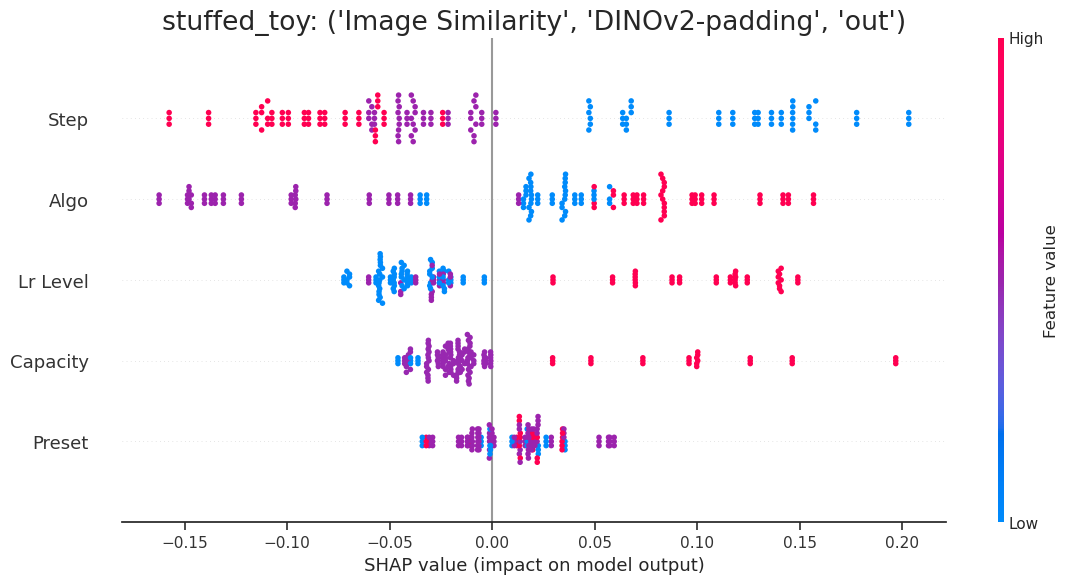

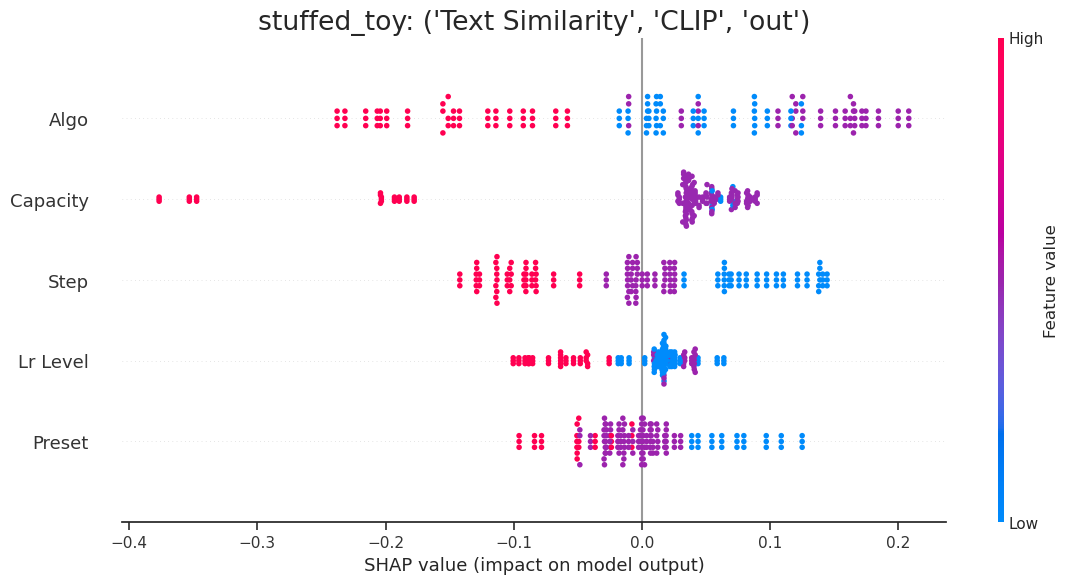

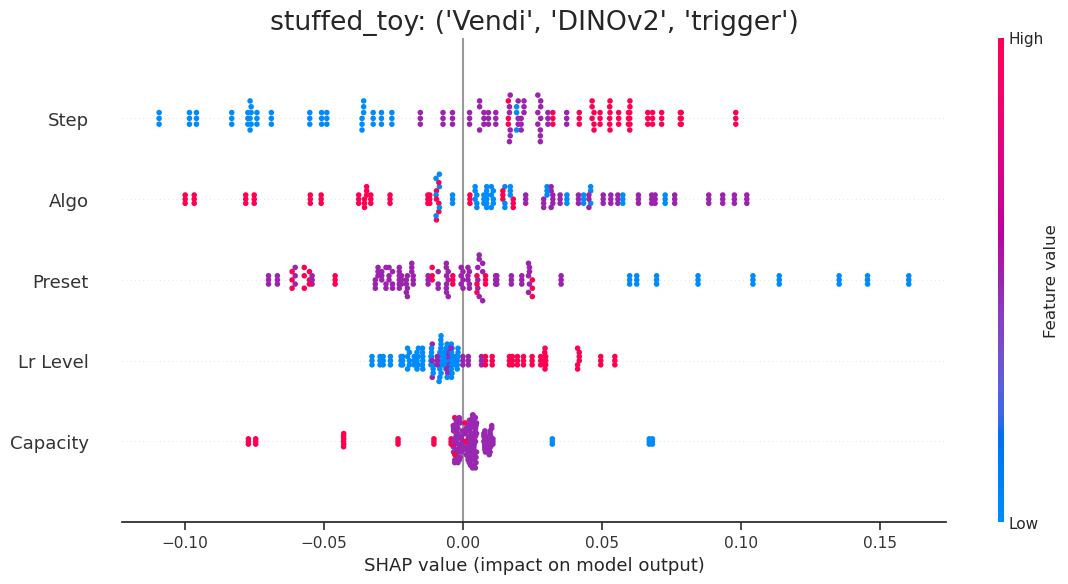

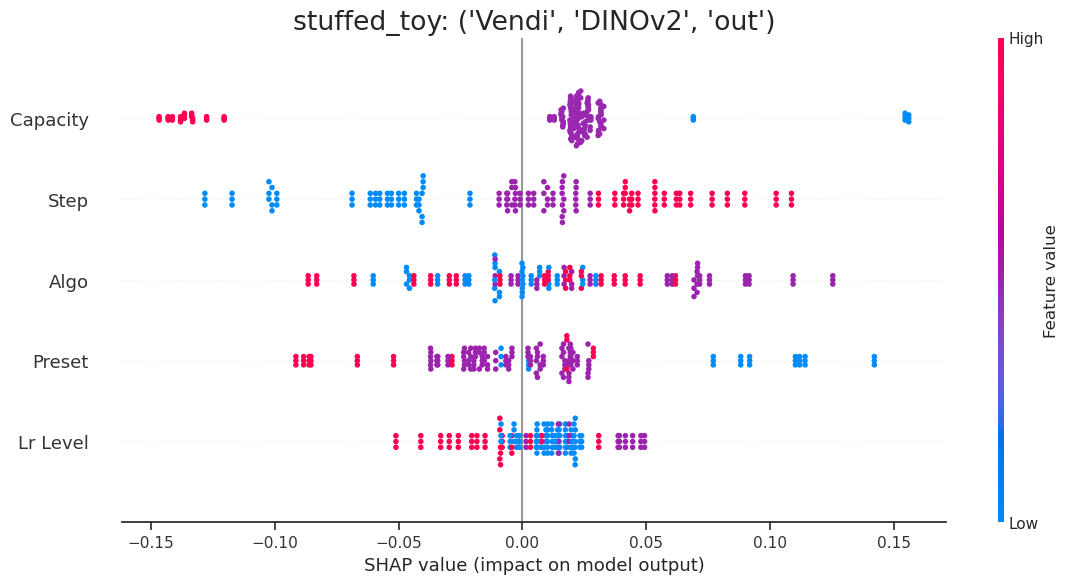

In [15]:
shap_values_list = []

for metric in metrics_to_include:
    plt.figure(figsize=(10, 8))
    shap_values = analysis.models[metric]['shap_values']
    shap.summary_plot(shap_values,
                      analysis.X_for_plot,
                      show=False,
                      plot_size=(12, 6))
    shap_values_list.append(shap_values)
    plt.title(f"{category}: {metric}")
    save_dir = f"figures/{metric}"
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(f"figures/{metric}/{category}_{metric}_shap.png")

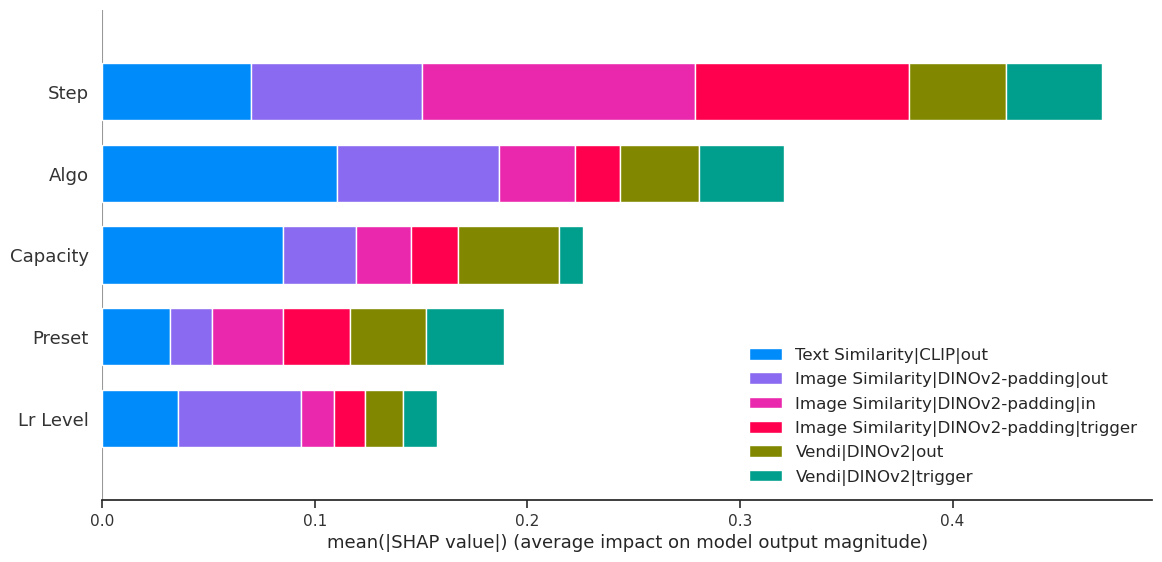

In [16]:
plt.figure(figsize=(20, 12))

shap.summary_plot(
    shap_values_list,
    analysis.X_for_plot,
    plot_type="bar",
    class_names=['|'.join(parts) for parts in metrics_to_include],
    feature_names=analysis.X_for_plot.columns,
    plot_size=(12, 6),
    show=False)
plt.savefig(
    f"figures/{category}_{metric}_shap_feature_importance.png"
)

### Step = 10

In [22]:
metrics_aggregated_10 = metrics_aggregated[metrics_aggregated['Step'] ==
                                           10].drop(columns=['Step'], level=0)

In [24]:
analysis = FeatureAnalysis(metrics_aggregated_10, keyword=category, drop_step=True)
analysis.fit(metrics_to_include, test_size=None)

Fitting ('Image Similarity', 'DINOv2-padding', 'in')
Training performance
RMSE: 0.09
R2: 0.57
Fitting ('Image Similarity', 'DINOv2-padding', 'trigger')
Training performance
RMSE: 0.09
R2: 0.69
Fitting ('Image Similarity', 'DINOv2-padding', 'out')
Training performance
RMSE: 0.14
R2: 0.60
Fitting ('Text Similarity', 'CLIP', 'out')
Training performance
RMSE: 0.08
R2: 0.81
Fitting ('Vendi', 'DINOv2', 'trigger')
Training performance
RMSE: 0.10
R2: 0.70
Fitting ('Vendi', 'DINOv2', 'out')
Training performance
RMSE: 0.09
R2: 0.79


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


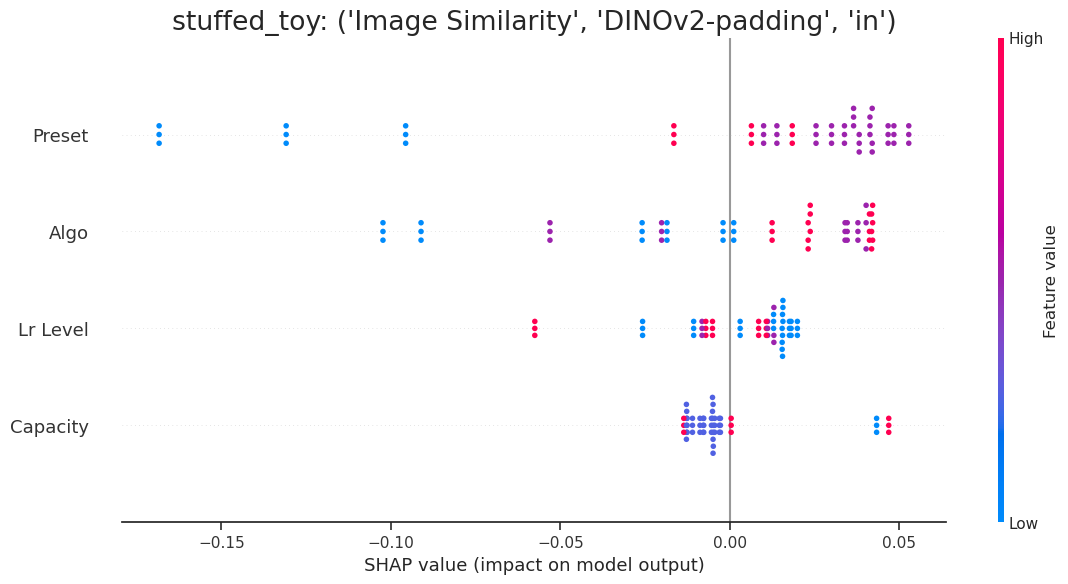

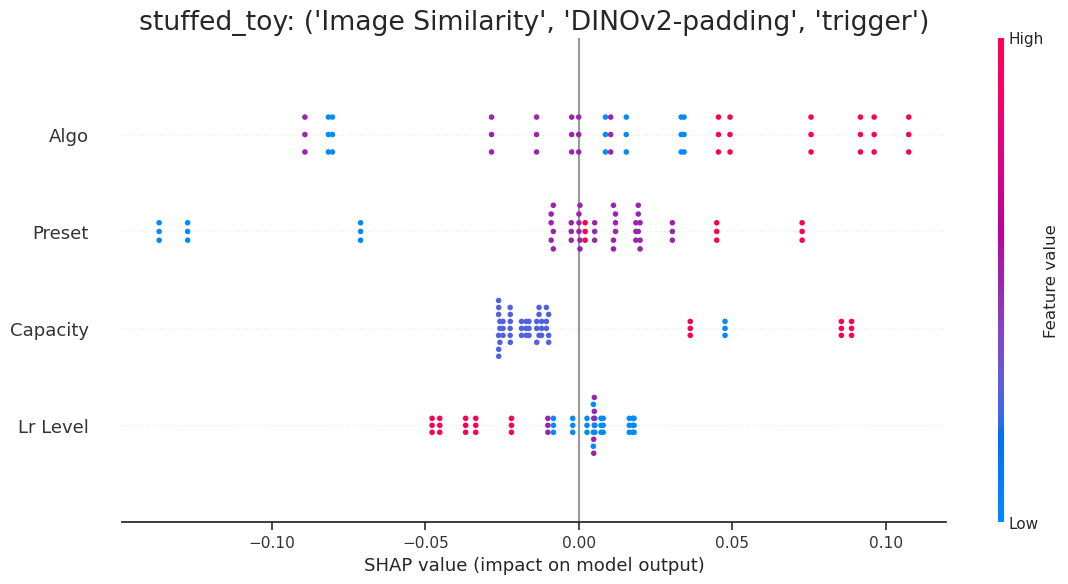

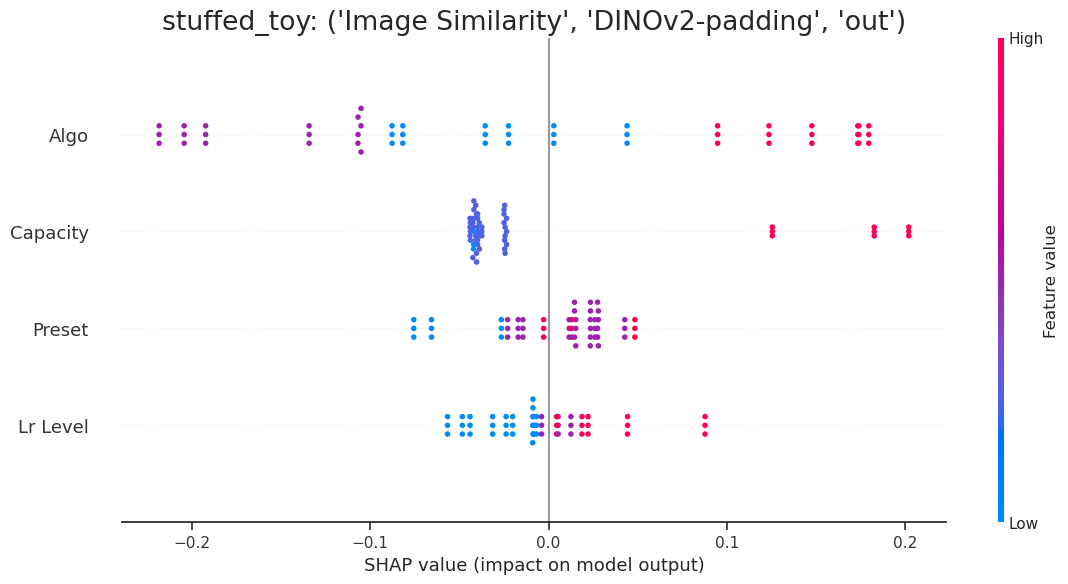

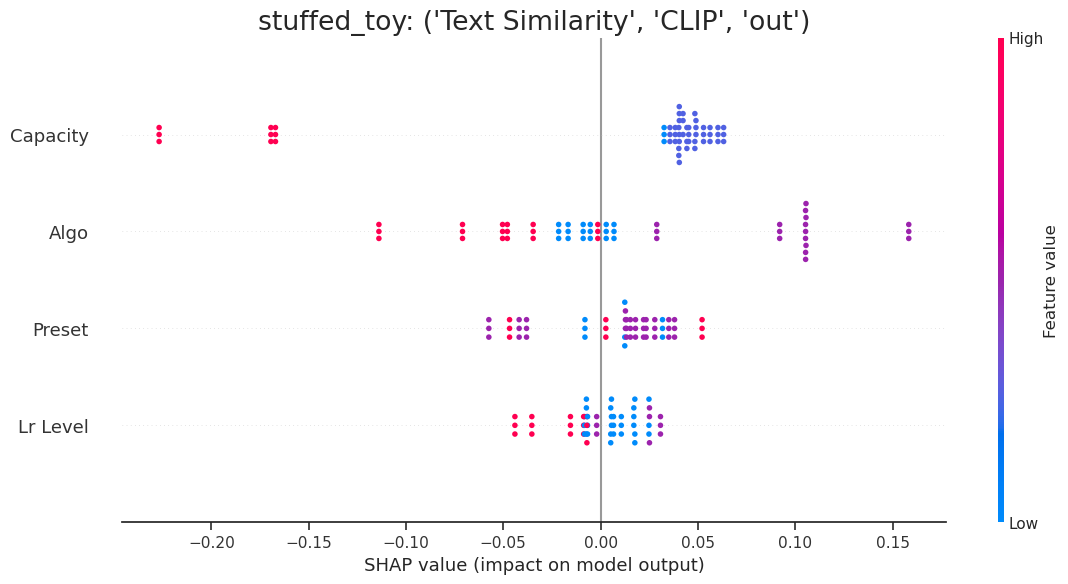

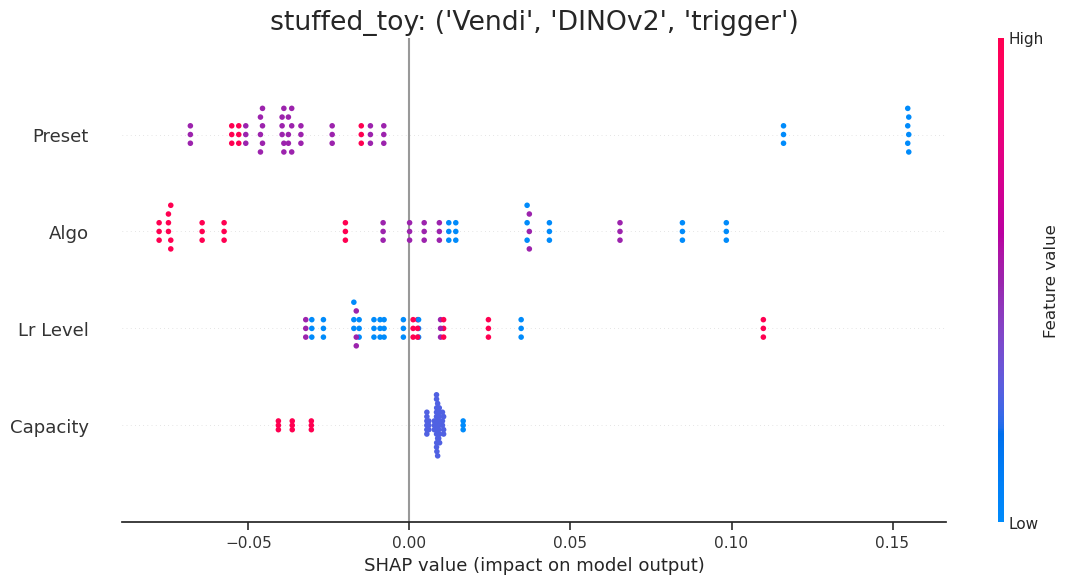

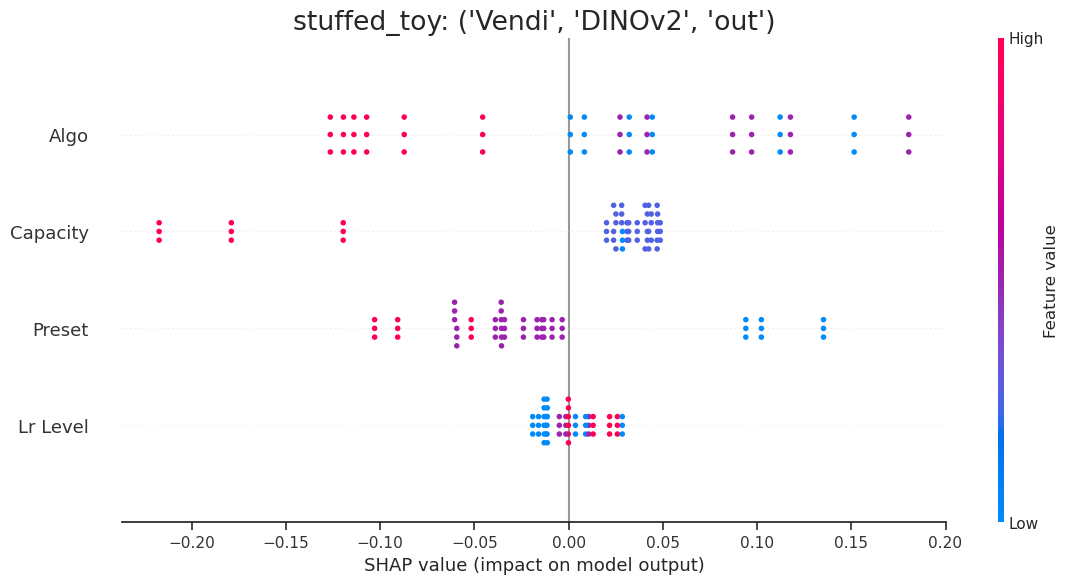

In [25]:
shap_values_list = []

for metric in metrics_to_include:
    plt.figure(figsize=(10, 8))
    shap_values = analysis.models[metric]['shap_values']
    shap.summary_plot(shap_values,
                      analysis.X_for_plot,
                      show=False,
                      plot_size=(12, 6))
    shap_values_list.append(shap_values)
    plt.title(f"{category}: {metric}")
    save_dir = f"figures/{metric}"
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(f"figures/{metric}/{category}-10_{metric}_shap.png")

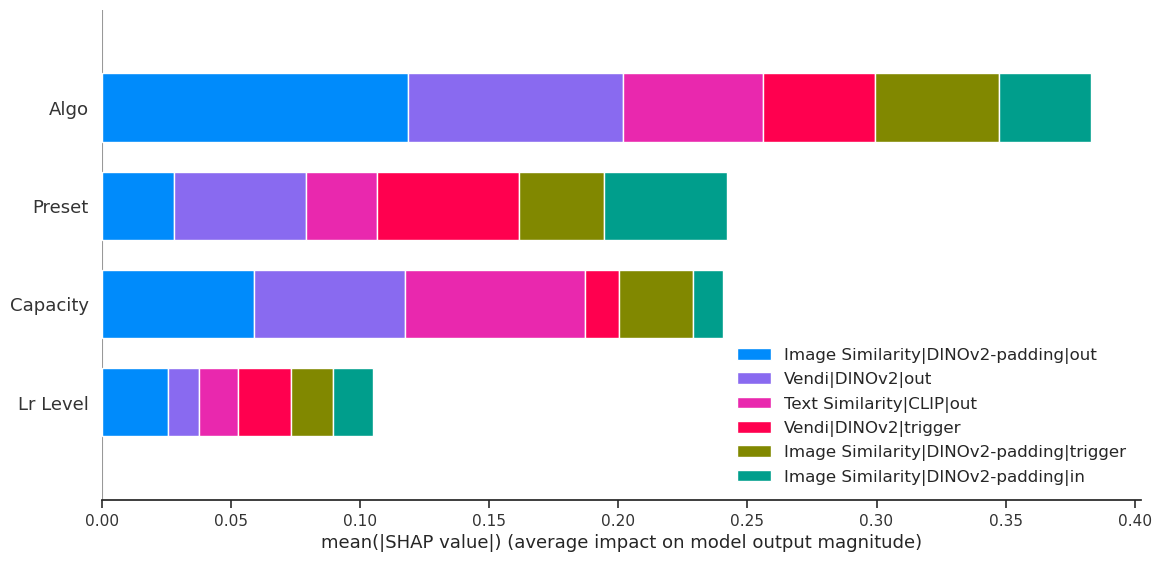

In [26]:
plt.figure(figsize=(20, 12))

shap.summary_plot(
    shap_values_list,
    analysis.X_for_plot,
    plot_type="bar",
    class_names=['|'.join(parts) for parts in metrics_to_include],
    feature_names=analysis.X_for_plot.columns,
    plot_size=(12, 6),
    show=False)
plt.savefig(
    f"figures/{category}-10_{metric}_shap_feature_importance.png"
)